#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




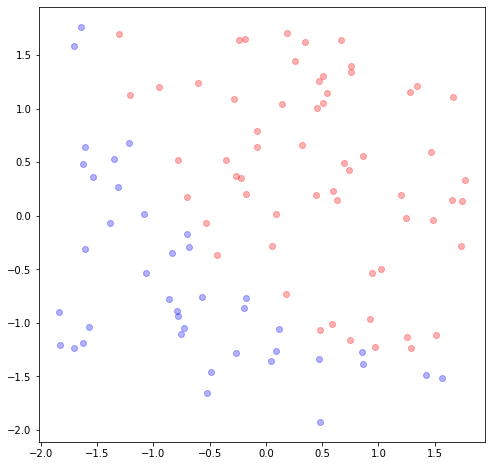

In [6]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm





data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

mu_x = np.mean(x)
s_x = np.std(x)
x = (x-mu_x)/s_x
mu_y = np.mean(y)
s_y = np.std(y)
y = (y-mu_y)/s_y


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()





In [0]:

lb_0 = np.column_stack([np.ones(len(x_label0)), x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([np.ones(len(x_label1)), x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])


label == 0 의 결과
``` python
    array([ True,  True,  True, False, False,  True, False, False, False,
       False,  ...])
```

`x[label == 0]` true 인 것들만 선택해서 ndarray로 가져와준다.

정체미상의 데이터들입니다.  
- load the training data file ('data.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

- $\hat{h} = \sigma(z)$ 
- $z = \theta_0 + \theta_1 x + \theta_2 y$, where $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

- $J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$


---




함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  



---



- $\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $(\theta_0^{(0)}, \theta_1^{(0)}, \theta_2^{(0)})$


위의 플롯을 보니 $\theta_{initial}$은 $[2,1,1]$이 제일 적합할 것 같습니다.

이것을 바탕으로 다음 $\theta$를 정해봅니다.



In [0]:
alpha = 0.0003
m = len(train_set)

def z(th, x):
    return np.matmul(th,x)
def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def J(th, data): 
    return (1/(m)) * np.sum(-data[:,3] * np.log(h(th,np.transpose(data[:,0:3]))) -(1-data[:,3]) * np.log(1 - h(th,np.transpose(data[:,0:3]))))


# np.sum((h(th, np.transpose(data[:,0:4]))- data[:,4]) ** 2)
def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:3])) - train_set[:,3])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * train_set[:,j] )) )
    return np.array(result)


In [25]:
g_th = np.array([2,1,1])
J_log_train = [J(g_th, train_set)]
th_log = [g_th]


# import sys
e = 5.6*10 ** (-8)
from tqdm import tqdm, trange

for i in tqdm(range(100000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    th_log.append(g_th)
    if abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break


100%|██████████| 100000/100000 [00:12<00:00, 7948.41it/s]


In [27]:
print(J_log_train[-2])

0.22765816740382097




---



##### 2. Plot the estimated parameters [3pt]
- plot the estimated parameters $(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence
- the colors for the parameters $(\theta_0, \theta_1, \theta_2)$ should be red, green, blue, respectively

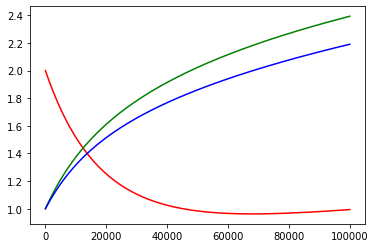

In [28]:
th_log = np.array(th_log)
#플롯을 위한 준비


plt.plot(th_log[:,0],c='red')
plt.plot(th_log[:,1],c='green')
plt.plot(th_log[:,2],c='blue')

plt.show()


##### 3. Plot the training error [3pt]
- plot the training error $J(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence (in blue color)



In [0]:
plt.plot(J_log_train,c='blue')
plt.show()

##### 4. Plot the obtained classifier [4pt]
- plot the classifier $\sigma(z)$ where $z = \theta_0 + \theta_1 x + \theta_2 y$ with $x = [30 : 0.5 : 100]$ and $y = [30 : 0.5 : 100]$
- $[a : t : b]$ denotes a range of values from $a$ to $b$ with a stepsize $t$
- use a colormap where blue is used for 0, red is used for 1, their weighted combination for a value between 0 and 1
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1) superimposed on the classifier

In [0]:
plt.plot(J_log_train,c='red')
plt.show()